In [1]:
%matplotlib inline
from pylab import *

In [2]:
from deficit_defs import *

Splikes version  0.1.2
Plasticnet version  0.1.9
macOS-10.16-x86_64-i386-64bit
Base Image File: asdf/bbsk081604_all_log2dog.asdf


In [3]:
_debug = False
if _debug:
    print("Debugging")

In [4]:
base='sims/2023-01-25'
if not os.path.exists(base):
    print(f"mkdir {base}")
    os.mkdir(base)

In [5]:
def run_one_deficit_jitter(params,run=True,overwrite=False):
    import plasticnet as pn
    count,eta,noise,blur,mu_c,sigma_c,number_of_neurons,sfname=(params.count,params.eta,params.noise,
                        params.blur,params.mu_c,params.sigma_c,params.number_of_neurons,params.sfname)
    
    if not overwrite and os.path.exists(sfname):
        return sfname
    
    
    seq=pn.Sequence()

    t=16*day
    ts=1*hour

    # DEBUG
    if _debug:
        t=1*minute
        ts=1*second

    seq+=blur_jitter_deficit(blur=[blur,-1],
                                total_time=t,
                                noise=noise,
                                eta=eta,number_of_neurons=number_of_neurons,
                                mu_c=mu_c,sigma_c=sigma_c,
                                save_interval=ts)


    if run:
        seq.run(display_hash=False)
        pn.save(sfname,seq) 
    
    return sfname
    

In [6]:
def to_named_tuple(params_list):
    from collections import namedtuple
    keys=list(params_list[0].keys())
    keys+=['count']
    params=namedtuple('params',keys)
    
    tuples_list=[]
    for count,p in enumerate(params_list):
        p2=params(count=count,
                  **p)
        tuples_list.append(p2)
        
        
    return tuples_list

In [12]:
def make_do_params(all_params,verbose=False):
    do_params=[]
    for p in all_params:
        if os.path.exists(p.sfname):
            if verbose:
                print("Skipping %s...already exists" % p.sfname)
        else:
            do_params+=[p]

    if verbose:
        print("%d sims" % len(do_params))    
        if len(do_params)<=15:
            print(do_params)
        else:
            print(do_params[:5],"...",do_params[-5:])        
    return do_params

In [13]:
number_of_neurons=25
eta=1e-6
number_of_processes=4

In [14]:
func=func=run_one_deficit_jitter


blur_mat=[0,2,4,6,8,10,12]
open_eye_noise_mat=[0,.1,.2,.3,.4,.5]
mu_c_mat=[0,7,13,21]

sigma_c=0


all_params=[]
for m,mu_c in enumerate(mu_c_mat):
    for b,blur in enumerate(blur_mat):
        for n,noise in enumerate(open_eye_noise_mat):
            sfname=base+f'/deficit {number_of_neurons} neurons noise {noise:.1f} blur {blur:0.1f} mu_c {mu_c:0.1f}.asdf'

            p=Struct()
            p.eta=eta
            p.number_of_neurons=number_of_neurons
            p.sfname=sfname

            p.noise=noise
            p.blur=blur
            p.mu_c=mu_c
            p.sigma_c=sigma_c

            all_params+=[p]

all_params=to_named_tuple(all_params)  

In [15]:
do_params=make_do_params(all_params,verbose=False)

### premake the images

In [ ]:
# for params in tqdm(all_params):
#     func(params,run=False,overwrite=False)

In [12]:
# %%time
# print(func.__name__)
# func(do_params[0],overwrite=True)

In [12]:
real_time=7*minute+ 40
print(time2str(real_time*len(do_params)/number_of_processes))

5 h, 22 m, 0.00 s


In [ ]:
# pool = Pool(processes=6)
# result = pool.map_async(func, do_params)
# print(result.get())

In [ ]:
# N=28
# n=0
# for i in range(n*N:(n+1)*N):
#     func(do_params[i])

In [16]:
len(do_params)/6

28.0

In [13]:
do_params[:10]

[params(eta=1e-06, number_of_neurons=25, sfname='sims/2023-01-25/deficit 25 neurons noise 0.0 blur 0.0 mu_c 0.0.asdf', noise=0, blur=0, mu_c=0, sigma_c=0, count=0),
 params(eta=1e-06, number_of_neurons=25, sfname='sims/2023-01-25/deficit 25 neurons noise 0.1 blur 0.0 mu_c 0.0.asdf', noise=0.1, blur=0, mu_c=0, sigma_c=0, count=1),
 params(eta=1e-06, number_of_neurons=25, sfname='sims/2023-01-25/deficit 25 neurons noise 0.2 blur 0.0 mu_c 0.0.asdf', noise=0.2, blur=0, mu_c=0, sigma_c=0, count=2),
 params(eta=1e-06, number_of_neurons=25, sfname='sims/2023-01-25/deficit 25 neurons noise 0.3 blur 0.0 mu_c 0.0.asdf', noise=0.3, blur=0, mu_c=0, sigma_c=0, count=3),
 params(eta=1e-06, number_of_neurons=25, sfname='sims/2023-01-25/deficit 25 neurons noise 0.4 blur 0.0 mu_c 0.0.asdf', noise=0.4, blur=0, mu_c=0, sigma_c=0, count=4),
 params(eta=1e-06, number_of_neurons=25, sfname='sims/2023-01-25/deficit 25 neurons noise 0.5 blur 0.0 mu_c 0.0.asdf', noise=0.5, blur=0, mu_c=0, sigma_c=0, count=5),


In [15]:
raise ValueError("Done!")

## Plot the results

In [16]:
weak_i=0
strong_i=1

In [17]:
sfname='sims/2023-01-25/deficit 25 neurons noise 0.0 blur 4.0 mu_c 0.0.asdf'

In [18]:
R=Results(sfname)

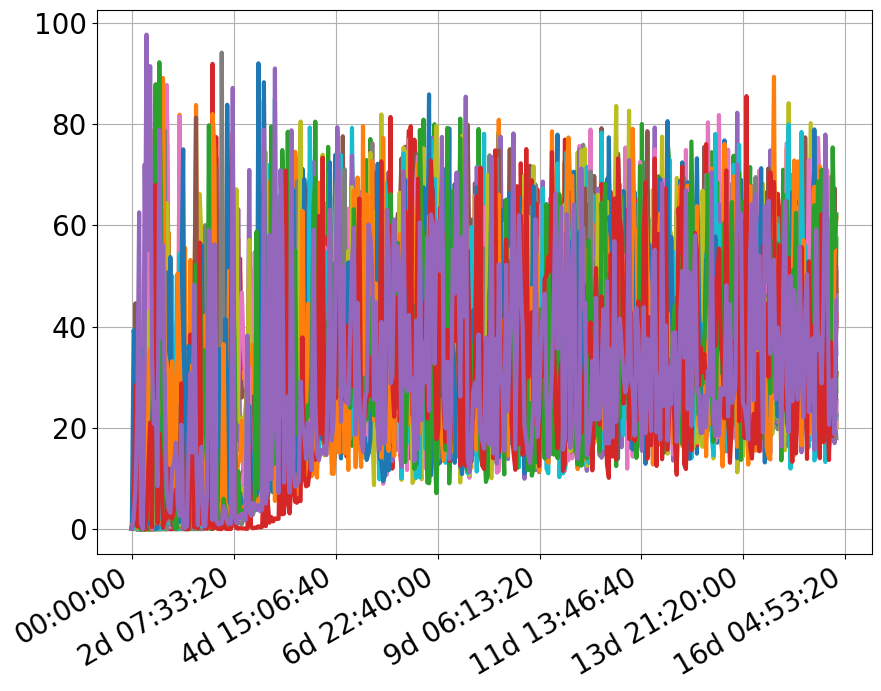

In [19]:
plot(R.t,R.θ);
reformat_time_axis()

sims/2023-01-25/deficit 25 neurons noise 0.0 blur 4.0 mu_c 0.0.asdf


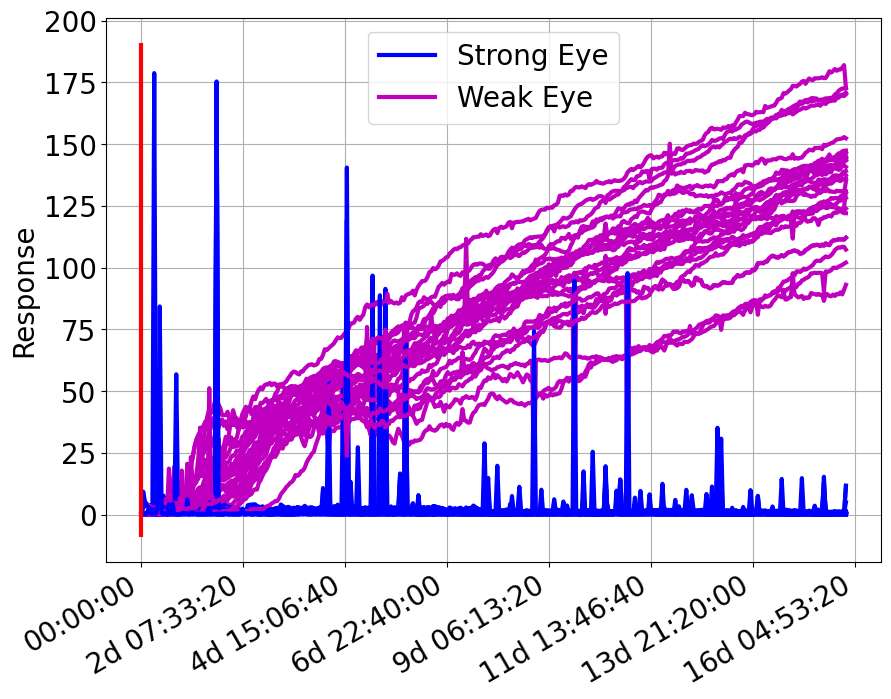

In [20]:
plot(R.t,R.y[:,0,strong_i],'b',label='Strong Eye')
plot(R.t,R.y[:,0,weak_i],'m',label='Weak Eye')

for n in range(25):
    plot(R.t,R.y[:,n,0],'m')
    plot(R.t,R.y[:,n,1],'b')
    
yl=gca().get_ylim()
vlines(R.sequence_times[0][0],yl[0],yl[1],'r')
    
ylabel('Response')
legend()
print(sfname)
reformat_time_axis()    

0it [00:00, ?it/s]

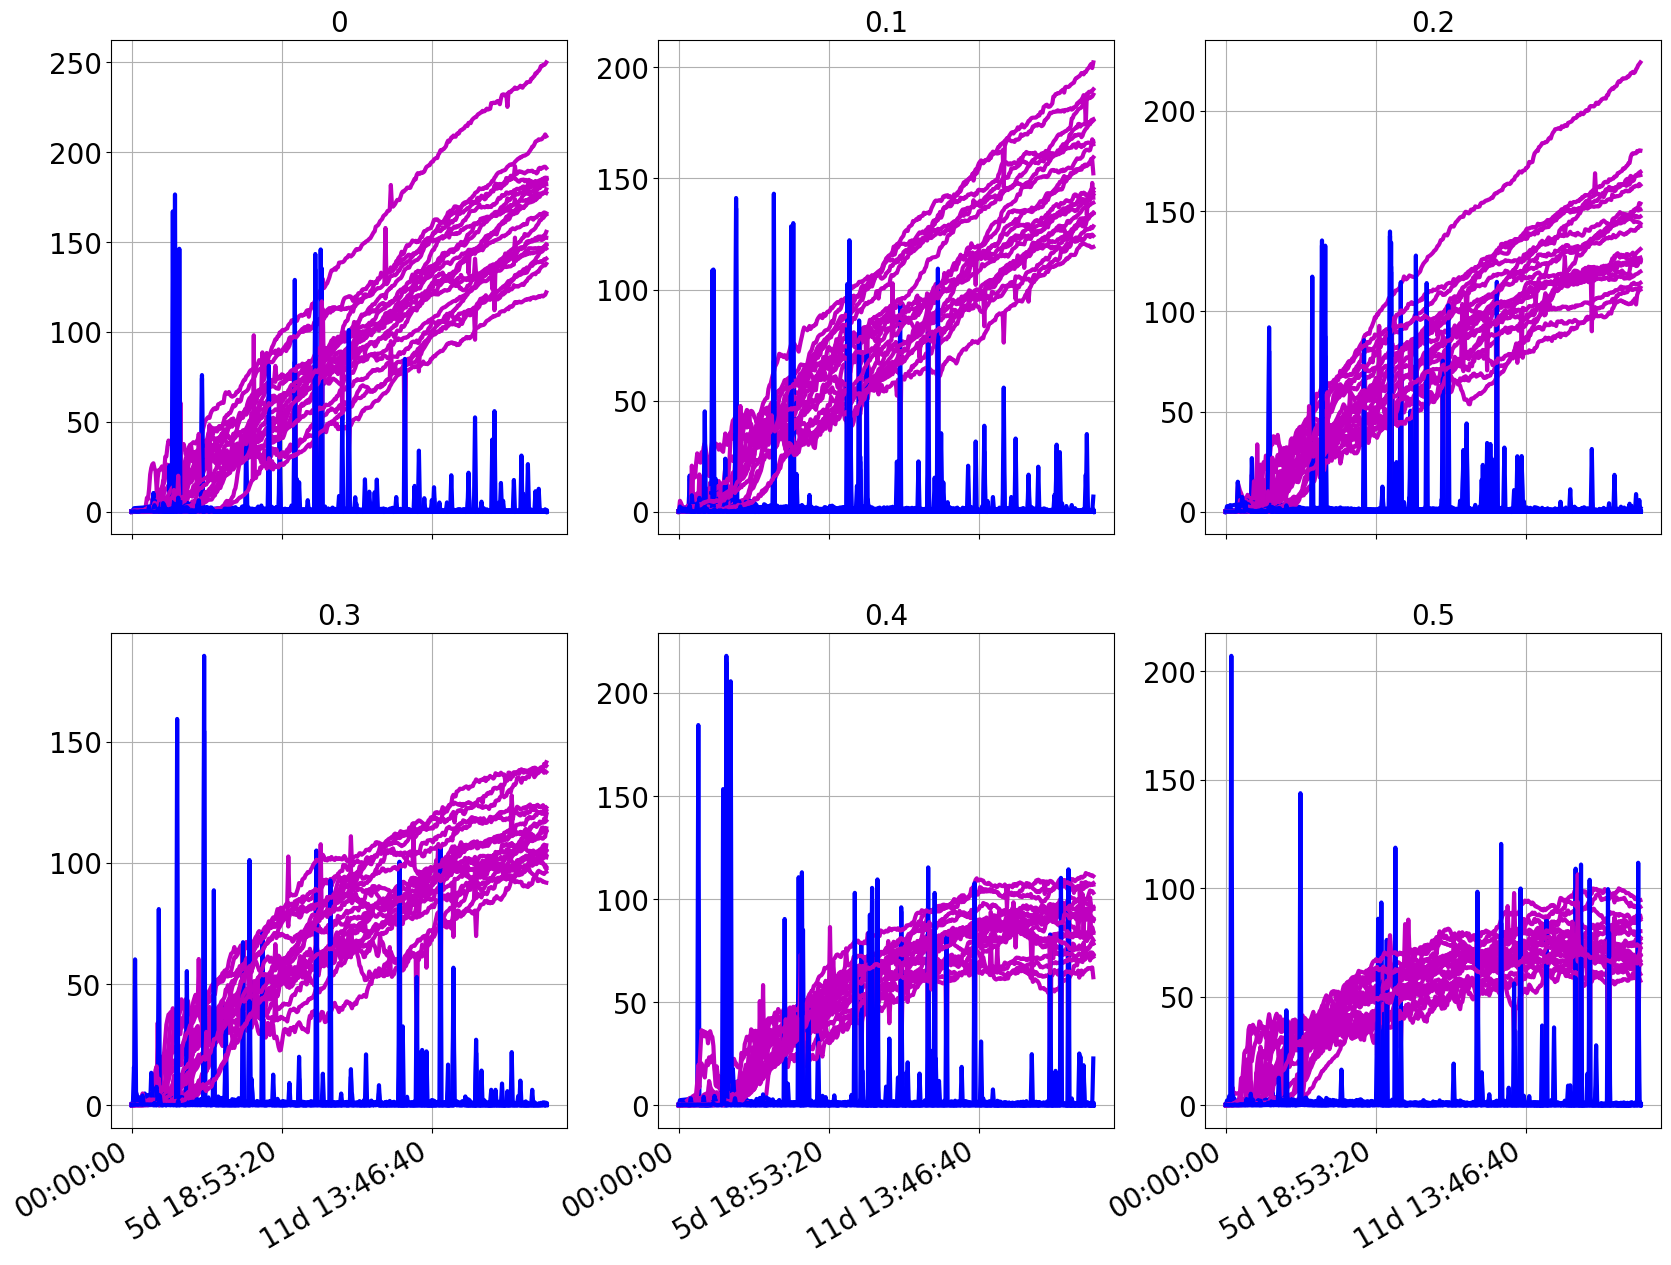

In [21]:
figure(figsize=(20,16))
number_of_neurons=25


blur_mat=[0,2,4,6,8,10,12]
noise_mat=open_eye_noise_mat=[0,.1,.2,.3,.4,.5]
mu_c_mat=[0,7,13,21]


sigma_c=0


blur=8
mu_c=7



for n,noise in tqdm(enumerate(noise_mat)):
    sfname=base+f'/deficit {number_of_neurons} neurons noise {noise:.1f} blur {blur:0.1f} mu_c {mu_c:0.1f}.asdf'
    
    subplot(2,3,n+1)
    R=Results(sfname)

    for n in range(20):
        plot(R.t,R.y[:,n,weak_i],'m')
        plot(R.t,R.y[:,n,strong_i],'b')

    title(noise)
    reformat_time_axis()    

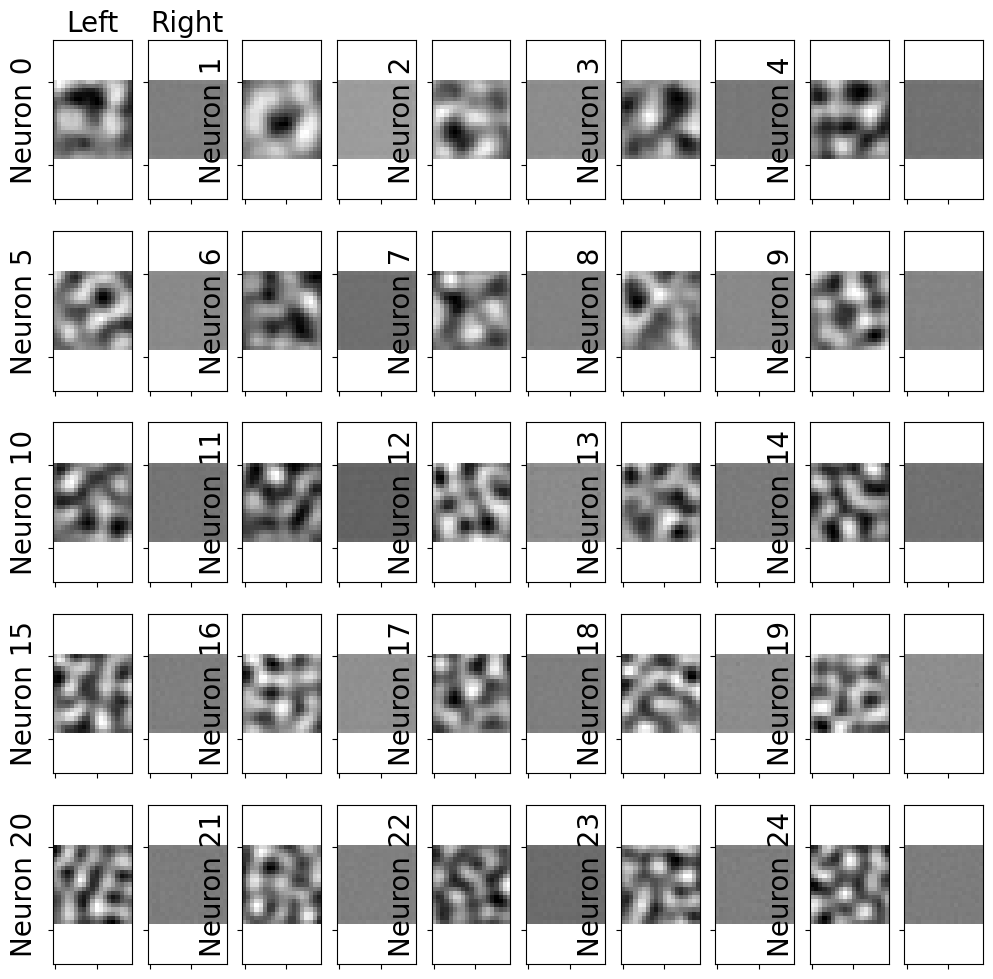

In [22]:
R.plot_rf_grid()

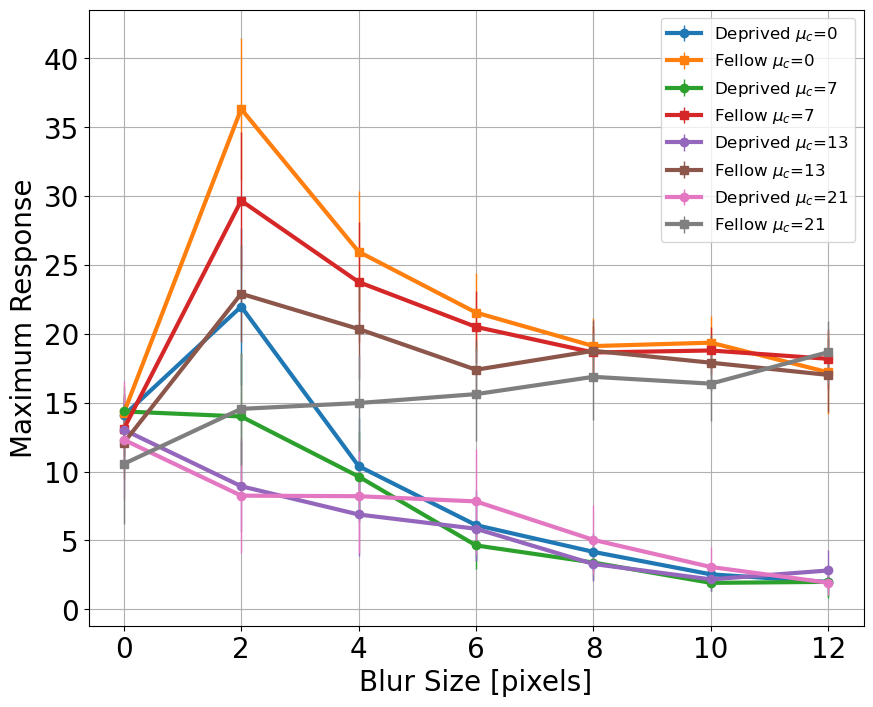

In [59]:
blur_mat=[0,2,4,6,8,10,12]
noise_mat=open_eye_noise_mat=[0,.1,.2,.3,.4,.5]
mu_c_mat=[0,7,13,21]

nn=0.1

count=-1
for m,mu_c in enumerate(mu_c_mat):
    s=Storage()
    for b,blur in enumerate(blur_mat):
        for n,noise in enumerate(open_eye_noise_mat):

            count+=1
            if noise!=nn:
                continue
                            
            params=all_params[count]

            R=Results(params.sfname)
            blur=params.blur
            
            assert noise==params.noise
            assert mu_c==params.mu_c
            μ1,μ2=R.μσ[0][0]
            σ1,σ2=R.μσ[1][0]
    
            s+=blur,μ1,μ2,σ1,σ2
        
            
    blur,μ1,μ2,σ1,σ2=s.arrays()
    
    errorbar(blur,μ1,yerr=2*σ1,marker='o',elinewidth=1,label=f'Deprived $\mu_c$={mu_c}')
    errorbar(blur,μ2,yerr=2*σ2,marker='s',elinewidth=1,label=f'Fellow $\mu_c$={mu_c}')
    
    
xlabel('Blur Size [pixels]')
ylabel('Maximum Response')
legend(fontsize=12,loc='best')    

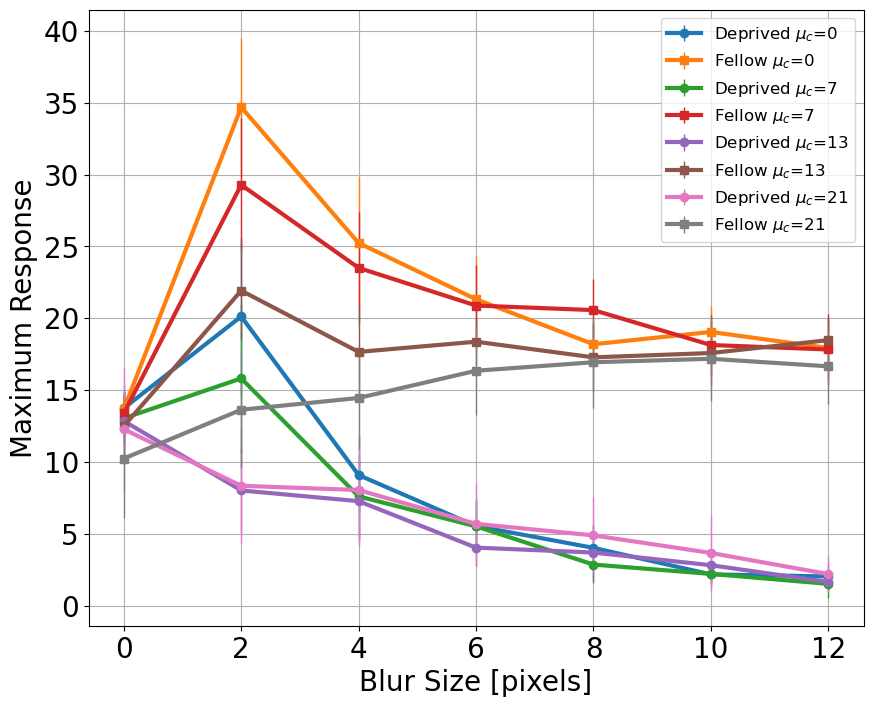

In [60]:
blur_mat=[0,2,4,6,8,10,12]
noise_mat=open_eye_noise_mat=[0,.1,.2,.3,.4,.5]
mu_c_mat=[0,7,13,21]

nn=0.2

count=-1
for m,mu_c in enumerate(mu_c_mat):
    s=Storage()
    for b,blur in enumerate(blur_mat):
        for n,noise in enumerate(open_eye_noise_mat):

            count+=1
            if noise!=nn:
                continue
                            
            params=all_params[count]

            R=Results(params.sfname)
            blur=params.blur
            
            assert noise==params.noise
            assert mu_c==params.mu_c
            μ1,μ2=R.μσ[0][0]
            σ1,σ2=R.μσ[1][0]
    
            s+=blur,μ1,μ2,σ1,σ2
        
            
    blur,μ1,μ2,σ1,σ2=s.arrays()
    
    errorbar(blur,μ1,yerr=2*σ1,marker='o',elinewidth=1,label=f'Deprived $\mu_c$={mu_c}')
    errorbar(blur,μ2,yerr=2*σ2,marker='s',elinewidth=1,label=f'Fellow $\mu_c$={mu_c}')
    
    
xlabel('Blur Size [pixels]')
ylabel('Maximum Response')
legend(fontsize=12,loc='best')    

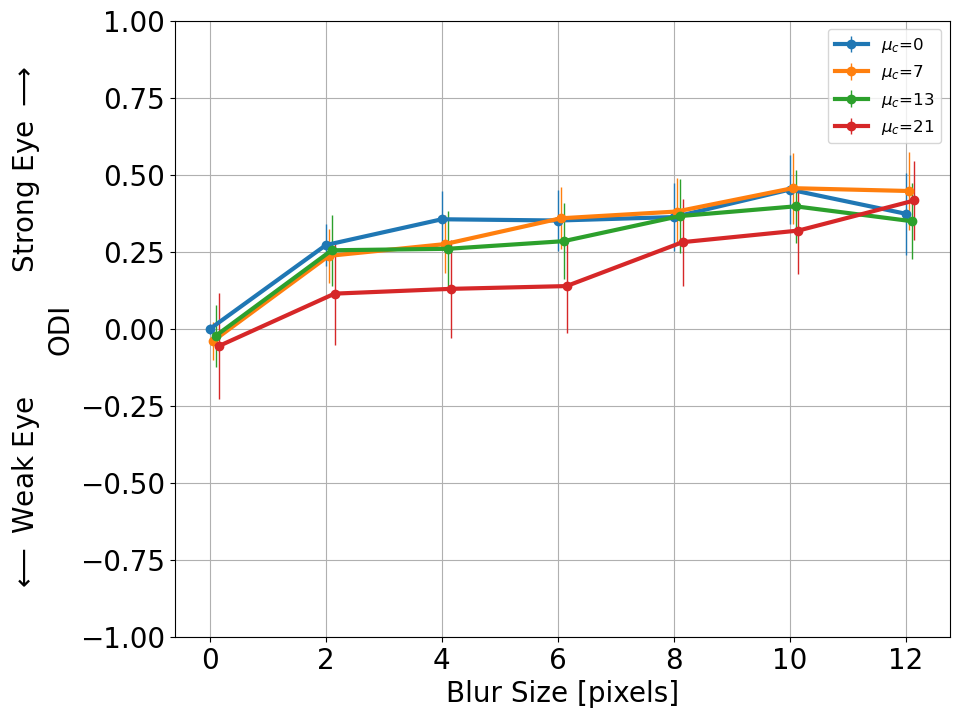

In [71]:
blur_mat=[0,2,4,6,8,10,12]
noise_mat=open_eye_noise_mat=[0,.1,.2,.3,.4,.5]
mu_c_mat=[0,7,13,21]

nn=0.1

count=-1
for m,mu_c in enumerate(mu_c_mat):
    μ=[]
    σ=[]
    
    for b,blur in enumerate(blur_mat):
        for n,noise in enumerate(open_eye_noise_mat):

            count+=1
            if noise!=nn:
                continue
                            
            params=all_params[count]

            R=Results(params.sfname)
            blur=params.blur
            
            assert noise==params.noise
            assert mu_c==params.mu_c

            y=R.ODI

            μ.append(y.mean())
            S=y.std()
            N=sqrt(len(y))
            K=1+20/N**2
            σ.append(K*S/sqrt(N))
            
    μ=array(μ).T
    σ=array(σ).T
    
    errorbar(array(blur_mat)+0.05*m,μ,yerr=σ,marker='o',elinewidth=1,label=f'$\mu_c$={mu_c}')
    
    
ylabel('ODI')
xlabel('Blur Size [pixels]')
ylabel(r'$\longleftarrow$ Weak Eye              Strong Eye $\longrightarrow$'+"\nODI")
ylim([-1,1])
legend(fontsize=12,loc='best')         


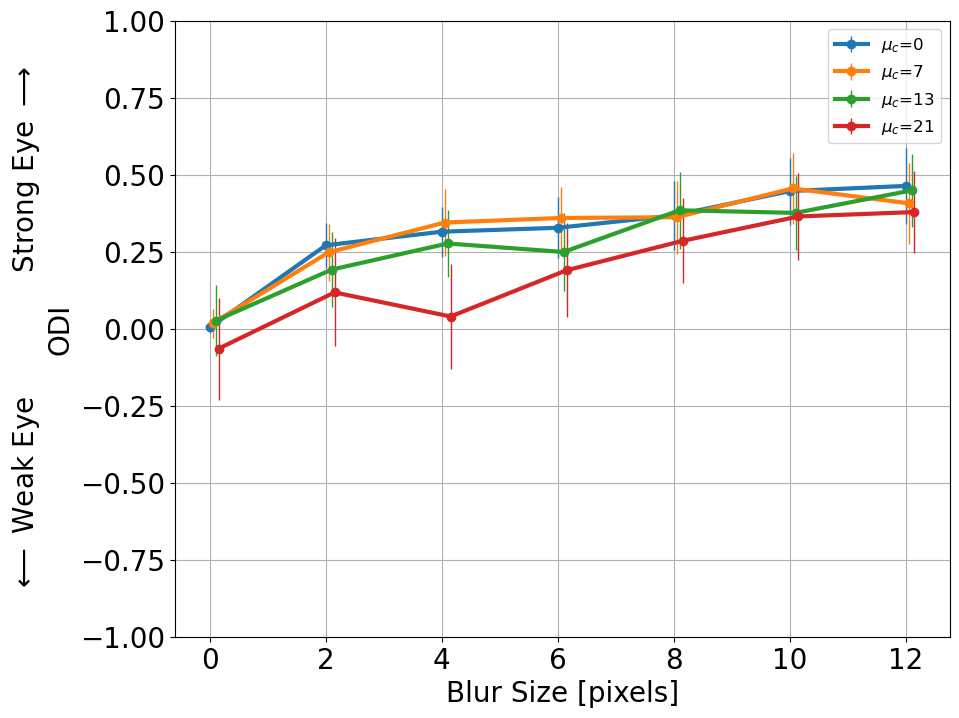

In [72]:
blur_mat=[0,2,4,6,8,10,12]
noise_mat=open_eye_noise_mat=[0,.1,.2,.3,.4,.5]
mu_c_mat=[0,7,13,21]

nn=0.4

count=-1
for m,mu_c in enumerate(mu_c_mat):
    μ=[]
    σ=[]
    
    for b,blur in enumerate(blur_mat):
        for n,noise in enumerate(open_eye_noise_mat):

            count+=1
            if noise!=nn:
                continue
                            
            params=all_params[count]

            R=Results(params.sfname)
            blur=params.blur
            
            assert noise==params.noise
            assert mu_c==params.mu_c

            y=R.ODI

            μ.append(y.mean())
            S=y.std()
            N=sqrt(len(y))
            K=1+20/N**2
            σ.append(K*S/sqrt(N))
            
    μ=array(μ).T
    σ=array(σ).T
    
    errorbar(array(blur_mat)+0.05*m,μ,yerr=σ,marker='o',elinewidth=1,label=f'$\mu_c$={mu_c}')
    
    
ylabel('ODI')
xlabel('Blur Size [pixels]')
ylabel(r'$\longleftarrow$ Weak Eye              Strong Eye $\longrightarrow$'+"\nODI")
ylim([-1,1])
legend(fontsize=12,loc='best')         


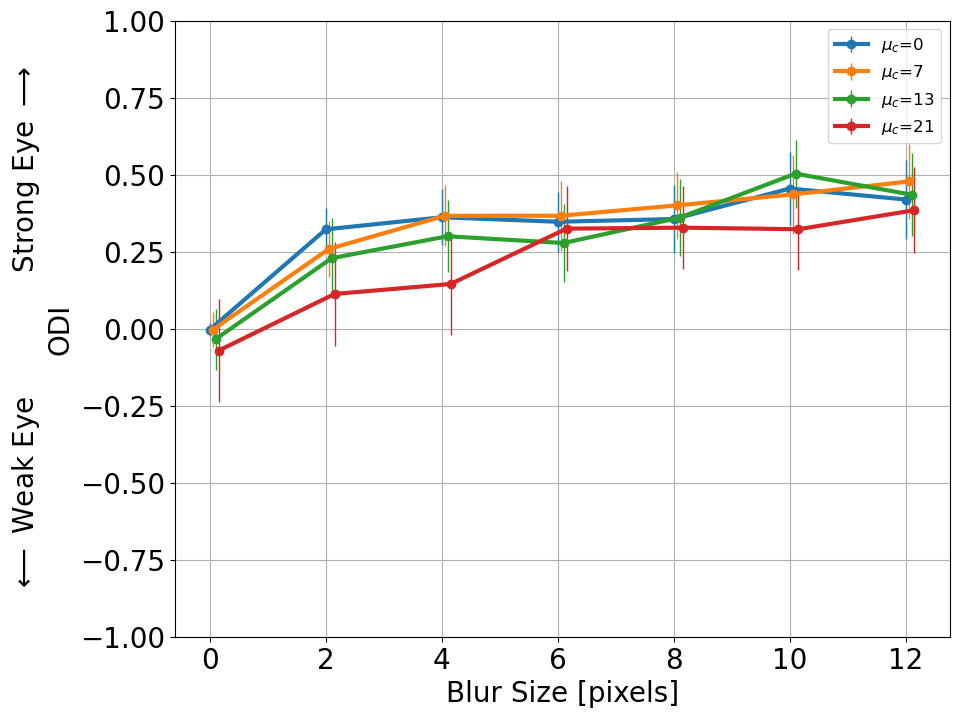

In [73]:
blur_mat=[0,2,4,6,8,10,12]
noise_mat=open_eye_noise_mat=[0,.1,.2,.3,.4,.5]
mu_c_mat=[0,7,13,21]

nn=0.5

count=-1
for m,mu_c in enumerate(mu_c_mat):
    μ=[]
    σ=[]
    
    for b,blur in enumerate(blur_mat):
        for n,noise in enumerate(open_eye_noise_mat):

            count+=1
            if noise!=nn:
                continue
                            
            params=all_params[count]

            R=Results(params.sfname)
            blur=params.blur
            
            assert noise==params.noise
            assert mu_c==params.mu_c

            y=R.ODI

            μ.append(y.mean())
            S=y.std()
            N=sqrt(len(y))
            K=1+20/N**2
            σ.append(K*S/sqrt(N))
            
    μ=array(μ).T
    σ=array(σ).T
    
    errorbar(array(blur_mat)+0.05*m,μ,yerr=σ,marker='o',elinewidth=1,label=f'$\mu_c$={mu_c}')
    
    
ylabel('ODI')
xlabel('Blur Size [pixels]')
ylabel(r'$\longleftarrow$ Weak Eye              Strong Eye $\longrightarrow$'+"\nODI")
ylim([-1,1])
legend(fontsize=12,loc='best')         
